In this notebook, we will look how to:

* plot geospatial points using scatter plots
* plot geometries using `geopandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Usually when we plot geospatial points (latitude, longitude), we make the longitude as the x-axis and the latitude as the y-axis. The positive values of latitude means **north**, negative values mean **south**. While positive values of longitude mean **east**, negative values means **west**.

When extracting longitude and latitude from your data, you may find them:

* Separately tidy : Each in a separate column
* Combined: Both are in a pair and the pairs are in a column
* Mixed with other information : such as street address, postal code, etc. Usually this case is handeled using a regex.

In [2]:
chickens = pd.read_csv("assets/Domesticated_Hen_Permits_clean_adjusted_lat_lng.csv")
chickens.head()

,Unnamed: 0,permit,city,state,zip,district,date_issued,lat,lng
0,0,288.0,Nashville,TN,37211,30.0,11/26/2014,36.029132,-86.724578
1,1,435.0,Nashville,TN,37211,19.0,05/18/2015,36.069132,-86.754578
2,2,270.0,Nashville,TN,37216,7.0,11/20/2014,36.236134,-86.711204
3,3,249.0,Nashville,TN,37216,25.0,12/29/2014,36.246134,-86.751204
4,4,200.0,Nashville,TN,37221,22.0,12/10/2014,36.029367,-86.935290


Text(0, 0.5, 'Latitude')

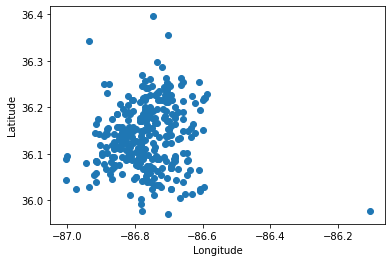

In [3]:
plt.scatter(chickens.lng, chickens.lat)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

We can visualize maps using **shapefiles**. Shapefiles store a special type of data known as *geometry*. A geometry can be:

* a point with a single pair of longitude and latitude
* a line with 2 pairs of longitude and latitude
* a polygon with more than 2 pairs that are connected to form a enclosed segment

These files are recognized by their extension **.shp**. Usually they are downloaded with other files and should be in the same directory with:

* .dbf : holds the attributes for each geometry
* .shx : links the attributes to the geometry

These files also should have the same file names. We can read and convert this .shp file to a `GeoDataFrame` using `geopandas`.

```python
import geopandas as gpd

geodataframe = gpd.read_file("path/to/shapefile.shp")

"""
Note:
the shapefile .shp must be located in the same directory as the .dbf and .shx
"""
```

In [4]:
import geopandas as gpd

In [12]:
service_destrict = gpd.read_file("assets/ServiceDestrictShapefile/ServiceDistricts.shp")
service_destrict.head()

,OBJECTID,AREA_SQ_MI,Name,geometry
0,0,198,Urban Services District,"POLYGON ((1766078.549 711757.270, 1766000.028 ..."
1,4,327,General Services District,"MULTIPOLYGON (((1800630.485 619627.187, 180060..."


Each `"Name"` in the `GeoDataFrame` represents a different location with its own geometry. Here we can see we have 2 districts; the General Service District and the Urban  Services District. To plot each in a different color, we call the `plot` method from the geodataframe with specifying `column` argument to be the column of the districts, here it's `"Name"`. You may want to transform geometries to a new coordinate reference system (usually WGS84 Latitude/Longitude: "EPSG:4326")


```python
geodataframe.to_crs(epsg=4326).plot(column = "Name", legend = True, figsize = (12, 12))
```

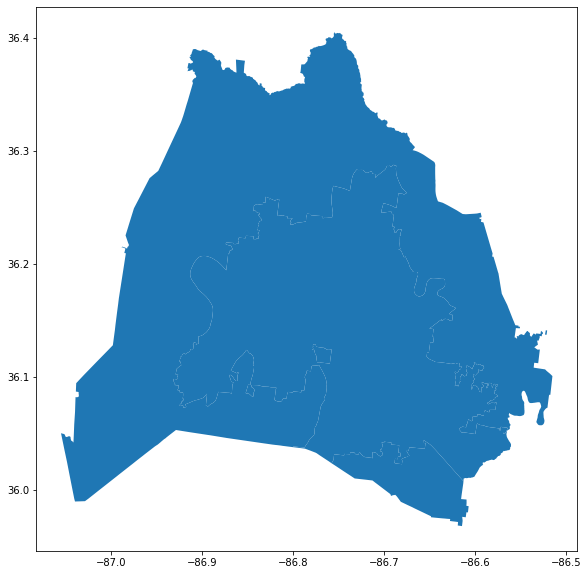

In [18]:
service_destrict.to_crs(epsg=4326).plot(figsize=(10, 10));

<AxesSubplot:>

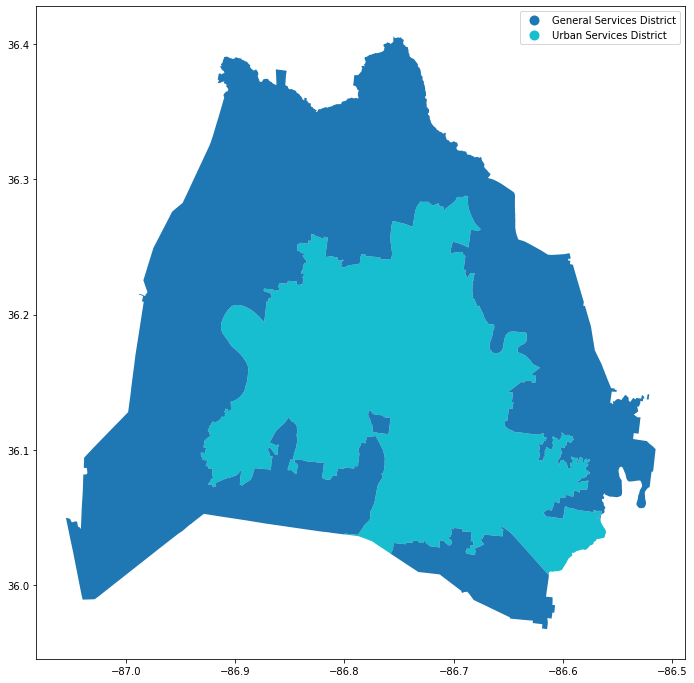

In [21]:
service_destrict.to_crs(epsg=4326).plot(column='Name', legend=True, figsize=(12, 12))


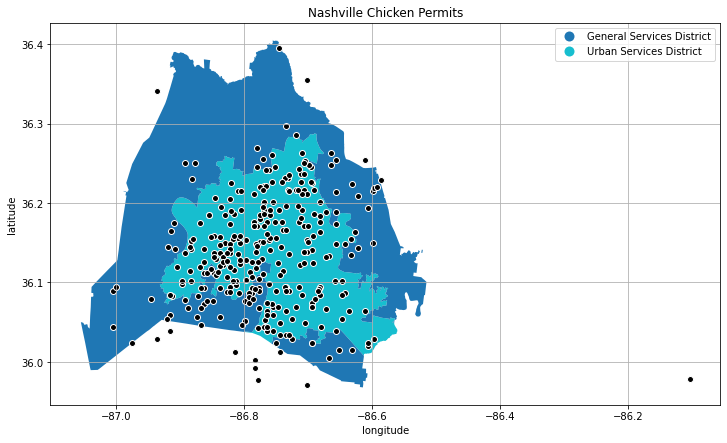

In [20]:
service_destrict.to_crs(epsg=4326).plot(column='Name', legend=True, figsize=(12, 12))
plt.scatter(chickens.lng, chickens.lat, c = "black", edgecolor = "white")
plt.grid()
plt.title("Nashville Chicken Permits")
plt.xlabel("longitude")
plt.ylabel("latitude");

And that was our first geospatial visualization.